In [1]:
# Fitting models
# Z_HD is is corrected z value - most accurate

In [2]:
# First let's set up our packages
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate

# And set some constants
c = 299792.458 # km/s (speed of light)
H0kmsmpc = 70.  # Hubble constant in km/s/Mpc
H0s = H0kmsmpc * 3.2408e-20 # H0 in inverse seconds is H0 in km/s/Mpc * (3.2408e-20 Mpc/km)

# Write a function for the integrand, i.e. 1/E(z)1/E(z)1/E(z),
def ezinv(z,om=0.3,ol=0.7,w0=-1.0,wa=0.0,orr=0.0):
    ok = 1.0 - om - ol
    ez = np.sqrt(om*(1+z)**3 + ok*(1+z)**2 + ol) 
    return 1./ez

# The curvature correction function
def Sk(xx, ok):
    if ok < 0.0:
        dk = np.sin(np.sqrt(-ok)*xx)/np.sqrt(-ok)
    elif ok > 0.0:
        dk = np.sinh(np.sqrt(ok)*xx)/np.sqrt(ok)
    else:
        dk = xx
    return dk

# The distance modulus
def dist_mod(zs,om=0.3,ol=0.7,w0=-1.0,wa=0.0,orr=0.0):
    """ Calculate the distance modulus, correcting for curvature"""
    ok = 1.0 - om - ol
    xx = np.array([integrate.quad(ezinv, 0, z, args=(om, ol, w0, wa, orr))[0] for z in zs])
    D = Sk(xx, ok)
    lum_dist = D * (1 + zs) 
    dist_mod = 5 * np.log10(lum_dist) # Distance modulus
    # Add an arbitrary constant that's approximately the log of c on Hubble constant minus absolute magnitude of -19.5
    dist_mod = dist_mod + np.log(c/H0kmsmpc)-(-19.5)  # You can actually skip this step and it won't make a difference to our fitting
    return dist_mod

1829


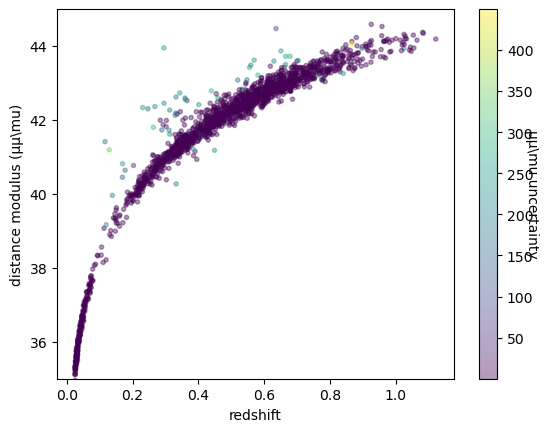

In [3]:
# Add a new function that reads in the data (data files should be in a directory called data)
import pandas as pd  # Pandas is a useful package to read in data files and select portions of the data

df = pd.read_csv('/Users/april/Downloads/DES-SN5YR_HD.csv') # Pandas reads into a "data frame (we'll call it df)"
zHELs = df['zHEL'].to_numpy() # You can keep using it in Pandas format, but just turning it into numpy arrays so it matches what you did above. 
zHDs = df['zHD'].to_numpy()
mu = df['MU'].to_numpy()
muerr = df['MUERR_FINAL'].to_numpy()
nSN = len(zHDs)
print(nSN)

hubblediagram=plt.scatter(zHDs,mu,marker='.',c=muerr,alpha=0.4)
plt.xlabel('redshift')
plt.ylabel('distance modulus (μμ\mu)')
cbar=plt.colorbar(hubblediagram)
cbar.set_label('μμ\mu uncertainty', rotation=270)
plt.ylim(35,45)
plt.show()

# Warning, with this many data points it's going to take a long time to do the fit!  Test with a small grid first!  
# And consider adding interpolation to determine luminosity distances instead of doing this many integrals.


In [4]:
# Need to contain errors to see trends properly
#muerr = muerr.astype(float)
#muerr[muerr > 5] = np.nan

C:\Users\april\AppData\Local\Temp\ipykernel_19828\3651504426.py:14: RuntimeWarning: invalid value encountered in sqrt
  ez = np.sqrt(om*(1+z)**3 + ok*(1+z)**2 + ol)
C:\Users\april\AppData\Local\Temp\ipykernel_19828\3651504426.py:31: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  xx = np.array([integrate.quad(ezinv, 0, z, args=(om, ol, w0, wa, orr))[0] for z in zs])


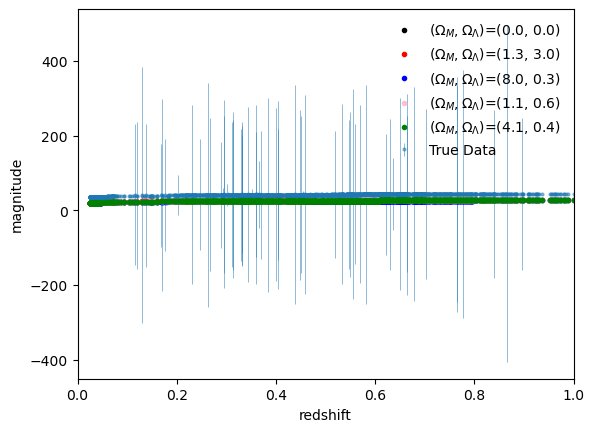

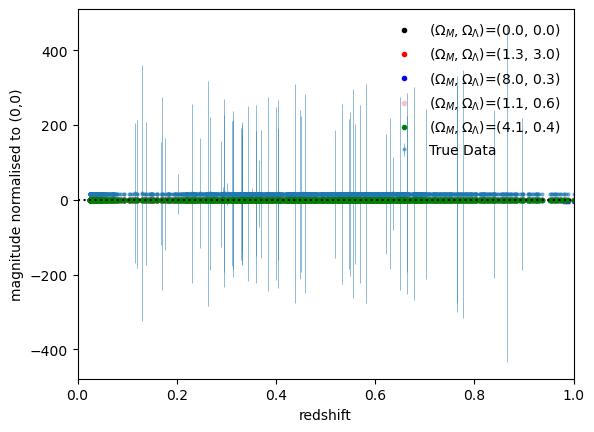

In [5]:
mu_om00_ox00 = dist_mod(zHDs,om=0.0,ol=0.0)  # We're going to use this empty model as a benchmark to compare the others to
mu_om13_ox30 = dist_mod(zHDs,om=1.3,ol=3.0)
mu_om80_ox03 = dist_mod(zHDs,om=8.0,ol=0.3)
mu_om30_ox07 = dist_mod(zHDs,om=3.0,ol=0.7)
mu_om11_ox06 = dist_mod(zHDs,om=1.1,ol=0.6)
mu_om41_ox04 = dist_mod(zHDs,om=4.1,ol=0.4)

# Plot it to see what it looks like, this is called a Hubble diagram
plt.errorbar(zHDs,mu,yerr=muerr,fmt='.',elinewidth=0.7,markersize=4,alpha=0.5, label = 'True Data')
plt.plot(zHDs,mu_om00_ox00,'.',color='black',label='($\\Omega_M,\\Omega_\\Lambda$)=(0.0, 0.0)')
plt.plot(zHDs,mu_om13_ox30,'.',color='red',label='($\\Omega_M,\\Omega_\\Lambda$)=(1.3, 3.0)')
plt.plot(zHDs,mu_om80_ox03,'.',color='blue',label='($\\Omega_M,\\Omega_\\Lambda$)=(8.0, 0.3)')
#plt.plot(zHDs,mu_om30_ox07,'-',color='green',label='($\\Omega_M,\\Omega_\\Lambda$)=(3.0, 0.7)')
plt.plot(zHDs,mu_om11_ox06,'.',color='pink',label='($\\Omega_M,\\Omega_\\Lambda$)=(1.1, 0.6)')
plt.plot(zHDs,mu_om41_ox04,'.',color='green',label='($\\Omega_M,\\Omega_\\Lambda$)=(4.1, 0.4)')
plt.xlim(0,1.0)
plt.xlabel('redshift')
plt.ylabel('magnitude')
plt.legend(frameon=False)
plt.show()

# Now plot a Hubble diagram relative to the empty model (i.e. subtract the empty model from all the data and models)
plt.errorbar(zHDs,mu-mu_om00_ox00,yerr=muerr,fmt='.',elinewidth=0.7,markersize=4,alpha=0.5, label = 'True Data')
plt.plot(zHDs,mu_om00_ox00-mu_om00_ox00,'.',color='black',label='($\\Omega_M,\\Omega_\\Lambda$)=(0.0, 0.0)')
plt.plot(zHDs,mu_om13_ox30-mu_om00_ox00,'.',color='red',label='($\\Omega_M,\\Omega_\\Lambda$)=(1.3, 3.0)')
plt.plot(zHDs,mu_om80_ox03-mu_om00_ox00,'.',color='blue',label='($\\Omega_M,\\Omega_\\Lambda$)=(8.0, 0.3)')
#plt.plot(zHDs,mu_om30_ox07-mu_om00_ox00,'--',color='green',label='($\\Omega_M,\\Omega_\\Lambda$)=(3.0, 0.7)')
plt.plot(zHDs,mu_om11_ox06-mu_om00_ox00,'.',color='pink',label='($\\Omega_M,\\Omega_\\Lambda$)=(1.1, 0.6)')
plt.plot(zHDs,mu_om41_ox04-mu_om00_ox00,'.',color='green',label='($\\Omega_M,\\Omega_\\Lambda$)=(4.1, 0.4)')
plt.axhline(y=0.0,ls=':',color='black')
plt.xlim(0.0,1.0)
plt.xlabel('redshift')
plt.ylabel('magnitude normalised to (0,0)')
plt.legend(frameon=False)
plt.show()

In [6]:
#Normalising

# Calculate mscript for each of these, which is the thing that determines the vertical normalisation 
mscr_om13_ox30 = np.sum((mu_om13_ox30-mu)/muerr**2)/np.sum(1./muerr**2)
mscr_om80_ox03 = np.sum((mu_om80_ox03-mu)/muerr**2)/np.sum(1./muerr**2)
mscr_om30_ox07 = np.sum((mu_om30_ox07-mu)/muerr**2)/np.sum(1./muerr**2)
mscr_om11_ox06 = np.sum((mu_om11_ox06-mu)/muerr**2)/np.sum(1./muerr**2)
mscr_om41_ox04 = np.sum((mu_om41_ox04-mu)/muerr**2)/np.sum(1./muerr**2)

print(mscr_om13_ox30,mscr_om80_ox03,mscr_om30_ox07,mscr_om11_ox06,mscr_om41_ox04)


mu_om13_ox30 = mu_om13_ox30-mscr_om13_ox30
mu_om80_ox03 = mu_om80_ox03-mscr_om80_ox03
mu_om30_ox07 = mu_om30_ox07-mscr_om30_ox07
mu_om11_ox06 = mu_om11_ox06-mscr_om11_ox06
mu_om41_ox04 = mu_om41_ox04-mscr_om41_ox04

nan -16.328461676810505 -15.8205604477221 -15.515892563959035 -15.984322309996395


In [7]:
# Need to contain errors to see trends properly
# muerr = muerr.astype(float)
# muerr[muerr > 5] = np.nan

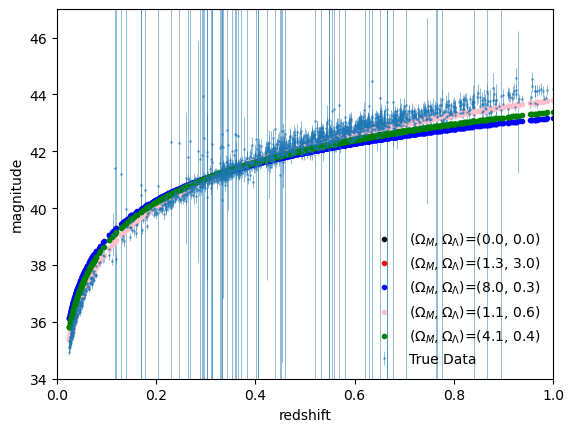

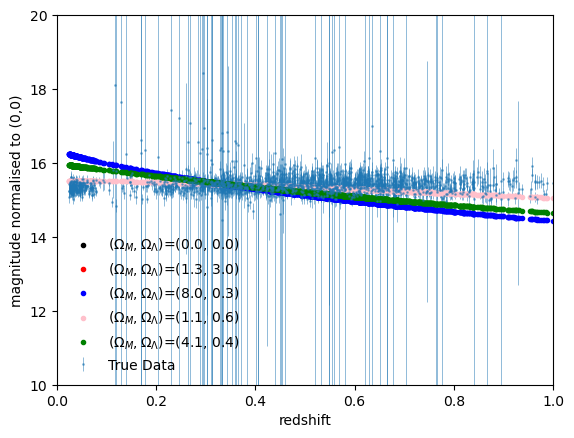

In [8]:
# Repeat the plot and see how it changes
# Plot it to see what it looks like, this is called a Hubble diagram
plt.errorbar(zHDs,mu,yerr=muerr,fmt='.',elinewidth=0.7,markersize=2,alpha=0.5, label = 'True Data')
plt.plot(zHDs,mu_om00_ox00,'.',color='black',label='($\\Omega_M,\\Omega_\\Lambda$)=(0.0, 0.0)')
plt.plot(zHDs,mu_om13_ox30,'.',color='red',label='($\\Omega_M,\\Omega_\\Lambda$)=(1.3, 3.0)')
plt.plot(zHDs,mu_om80_ox03,'.',color='blue',label='($\\Omega_M,\\Omega_\\Lambda$)=(8.0, 0.3)')
#plt.plot(zHDs,mu_om30_ox07,'--',color='green',markersize=0.5,label='($\\Omega_M,\\Omega_\\Lambda$)=(3.0, 0.7)')
plt.plot(zHDs,mu_om11_ox06,'.',color='pink',label='($\\Omega_M,\\Omega_\\Lambda$)=(1.1, 0.6)')
plt.plot(zHDs,mu_om41_ox04,'.',color='green',label='($\\Omega_M,\\Omega_\\Lambda$)=(4.1, 0.4)')
plt.xlim(0,1.0)
plt.ylim(34,47)
plt.xlabel('redshift')
plt.ylabel('magnitude')
plt.legend(frameon=False)
plt.show()

# Now plot a Hubble diagram relative to the empty model (i.e. subtract the empty model from all the data and models)
plt.errorbar(zHDs,mu-mu_om00_ox00,yerr=muerr,fmt='.',elinewidth=0.7,markersize=2,alpha=0.5, label = 'True Data')
plt.plot(zHDs,mu_om00_ox00-mu_om00_ox00,'.',color='black',label='($\\Omega_M,\\Omega_\\Lambda$)=(0.0, 0.0)')
plt.plot(zHDs,mu_om13_ox30-mu_om00_ox00,'.',color='red',label='($\\Omega_M,\\Omega_\\Lambda$)=(1.3, 3.0)')
plt.plot(zHDs,mu_om80_ox03-mu_om00_ox00,'.',color='blue',label='($\\Omega_M,\\Omega_\\Lambda$)=(8.0, 0.3)')
#plt.plot(zHDs,mu_om30_ox07-mu_om00_ox00,'--',color='green',markersize=1,label='($\\Omega_M,\\Omega_\\Lambda$)=(3.0, 0.7)')
plt.plot(zHDs,mu_om11_ox06-mu_om00_ox00,'.',color='pink',label='($\\Omega_M,\\Omega_\\Lambda$)=(1.1, 0.6)')
plt.plot(zHDs,mu_om41_ox04-mu_om00_ox00,'.',color='green',label='($\\Omega_M,\\Omega_\\Lambda$)=(4.1, 0.4)')

# plt.axhline(y=0.0,ls=':',color='black')
plt.xlim(0,1.0)
plt.ylim(10,20)
plt.xlabel('redshift')
plt.ylabel('magnitude normalised to (0,0)')
plt.legend(frameon=False)
plt.show()

In [12]:
# finding best fit using array
# tried to get chi squared near 1
# Set up the arrays for the models you want to test, e.g. a range of Omega_m and Omega_Lambda models:
n = 50                           # Increase this for a finer grid
oms = np.linspace(0.0, 0.5, n)   # Array of matter densities
ols = np.linspace(0.0, 1.0, n)   # Array of cosmological constant values
chi2 = np.ones((n, n)) * np.inf  # Array to hold our chi2 values, set initially to super large values

# Calculate Chi2 for each model
for i, om in enumerate(oms):                                          # loop through matter densities
        for j, ol in enumerate(ols):                                  # loop through cosmological constant densities
            mu_model = dist_mod(zHDs, om=om, ol=ol)                     # calculate the distance modulus vs redshift for that model 
            mscr = np.sum((mu_model-mu)/muerr**2)/np.sum(1./muerr**2) # Calculate the vertical offset to apply
            mu_model_norm = mu_model-mscr                             # Apply the vertical offset
            chi2[i,j] = np.sum((mu_model_norm - mu) ** 2 / muerr**2)  # Calculate the chi2 and save it in a matrix
            
# Convert that to a likelihood and calculate the reduced chi2
likelihood = np.exp(-0.5 * (chi2-np.amin(chi2)))  # convert the chi^2 to a likelihood (np.amin(chi2) calculates the minimum of the chi^2 array)
chi2_reduced = chi2 / (len(mu)-2)                 # calculate the reduced chi^2, i.e. chi^2 per degree of freedom, where dof = number of data points minus number of parameters being fitted 

# Calculate the best fit values (where chi2 is minimum)
indbest = np.argmin(chi2)                 # Gives index of best fit but where the indices are just a single number
ibest   = np.unravel_index(indbest,[n,n]) # Converts the best fit index to the 2d version (i,j)
print( 'Best fit values are (om,ol)=(%.3f,%.3f)'%( oms[ibest[0]], ols[ibest[1]] ) )
print( 'Reduced chi^2 for the best fit is %0.2f'%chi2_reduced[ibest[0],ibest[1]] )

Best fit values are (om,ol)=(0.296,0.531)
Reduced chi^2 for the best fit is 0.92


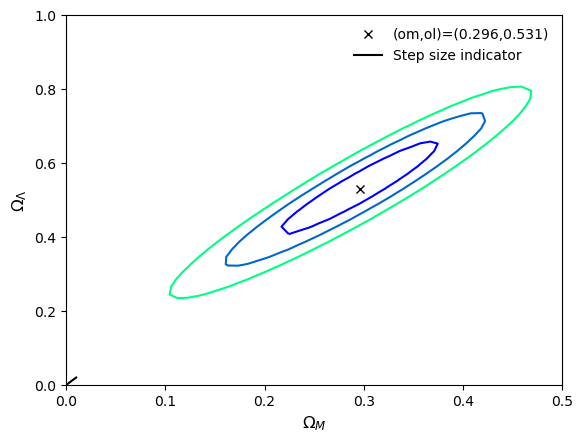

In [13]:
# Plot contours of 1, 2, and 3 sigma
plt.contour(oms,ols,np.transpose(chi2-np.amin(chi2)),cmap="winter",**{'levels':[2.30,6.18,11.83]})
plt.plot(oms[ibest[0]], ols[ibest[1]],'x',color='black',label='(om,ol)=(%.3f,%.3f)'%( oms[ibest[0]], ols[ibest[1]]) )
plt.xlabel("$\\Omega_M$", fontsize=12)
plt.ylabel("$\\Omega_Λ$", fontsize=12)
plt.plot([oms[0],oms[1]], [ols[0],ols[1]],'-',color='black',label='Step size indicator' ) # Delete this line after making step size smaller!
plt.legend(frameon=False)
#plt.savefig('plots/contours.png', bbox_inches="tight", transparent=True)
plt.show()
plt.close()